In [70]:
import numpy as np

temp = []
temp.append([10, 10, 10])
temp.append([30, 10, 10])
temp.append([10, 5, 30])
temp.append([30, 10, 30])
vertices = np.array(temp)

camera_point = (3, 3, 2)
vertex_vectors = vertices - camera_point


print(vertices[:,1])
print(vertex_vectors[:,1])

multiplier = []

for x in range(np.shape(vertices)[0]):
    multiplier.append(vertices[:,1][x] / vertex_vectors[:,1][x])

multiplier = np.array(multiplier)
print(np.diag(multiplier))
# multiplier = np.atleast_2d(multiplier).T


print(multiplier)

print(np.transpose(vertices))


out = np.matmul(np.transpose(vertex_vectors), np.diag(multiplier))

vertex_transformed = np.transpose(vertices) - out
vertex_transformed = np.transpose(vertex_transformed)
print(vertex_transformed)

[10 10  5 10]
[7 7 2 7]
[[1.42857143 0.         0.         0.        ]
 [0.         1.42857143 0.         0.        ]
 [0.         0.         2.5        0.        ]
 [0.         0.         0.         1.42857143]]
[1.42857143 1.42857143 2.5        1.42857143]
[[10 30 10 30]
 [10 10  5 10]
 [10 10 30 30]]
[[  0.           0.          -1.42857143]
 [ -8.57142857   0.          -1.42857143]
 [ -7.5          0.         -40.        ]
 [ -8.57142857   0.         -10.        ]]


In [4]:
import numpy as np 


test = [1,2,3,5]
# doesn't work
# print(np.array(test).diagonal())

print(np.diag(np.array(test)))

[[1 0 0 0]
 [0 2 0 0]
 [0 0 3 0]
 [0 0 0 5]]


In [7]:
x1 = np.arange(9.0).reshape((3, 3))

x2 = np.arange(3.0)

x3 = np.array([0, -1, 0])

print(x1)
print(x2)
print(x3)
np.subtract(x1, x2)
np.subtract(x1, x3)


[[0. 1. 2.]
 [3. 4. 5.]
 [6. 7. 8.]]
[0. 1. 2.]
[ 0 -1  0]


array([[0., 2., 2.],
       [3., 5., 5.],
       [6., 8., 8.]])

In [12]:
test = np.array([[1,2,3,4,5],[2,4,6,8,10],[3,6,9,12,15]])
print(np.shape(test))
test[:, 1] = [100]*np.shape(test)[0]
print(test)

(3, 5)
[[  1 100   3   4   5]
 [  2 100   6   8  10]
 [  3 100   9  12  15]]


[[10 30 10 30]
 [10 10 30 30]]
[[-10 -30 -10 -30]
 [-10 -10 -30 -30]]


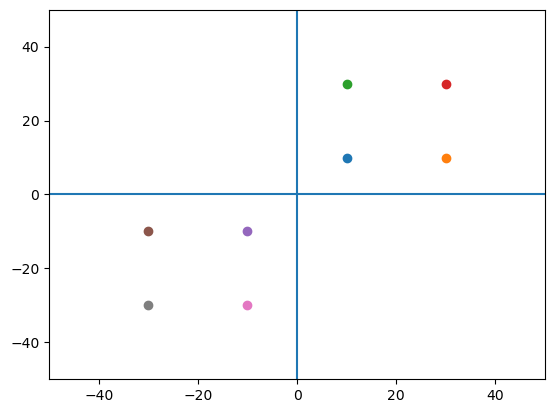

In [47]:


data = np.array([[10, 10, 10],
[30, 10, 10],
[10, 10, 30],
[30, 10, 30]])

rot_matrix = np.array([
    [-1,0],
    [0,-1]
])

data_2d = data[:, ::2].T
transformed_data_2d = np.matmul(rot_matrix, data[:,::2].T)

print(data[:, ::2].T)
print(np.matmul(rot_matrix, data[:,::2].T))

fig, ax = plt.subplots()
plt.axvline()
plt.axhline()
ax = plt.gca()
ax.set_xlim([-50, 50])
ax.set_ylim([-50, 50])

for x,y in zip(*data_2d):
    ax.scatter(x, y)

for x,y in zip(*transformed_data_2d):
    ax.scatter(x, y)

    

In [4]:
import numpy as np
def shift_origin(vertices, origin) -> np.array:
    return vertices - origin


data = np.array([
    [10, 10, 10],
    [30, 10, 10],
    [10, 10, 30],
    [30, 10, 30]
])

shift_origin(data, np.array([5,5,5]))

array([[ 5,  5,  5],
       [25,  5,  5],
       [ 5,  5, 25],
       [25,  5, 25]])

In [8]:
import numpy as np

radian = 1.9
vertices = np.array([
    [10, 10, 10],
    [30, 10, 10],
    [10, 10, 30],
    [30, 10, 30]
])
origin = np.array([10,12,5])

def rotate_matrix(radian) -> np.array:
    return [
        [np.cos(radian), -np.sin(radian)],
        [np.sin(radian), np.cos(radian)]
    ]

print(vertices)
vertices -= origin
print(vertices)
print(vertices + origin)

vert_2d = vertices[:, 1:].T
multiplied_vert_2d = np.matmul(rotate_matrix(radian), vert_2d).T
new_vertices = vertices.copy()
new_vertices[:, 1:] = multiplied_vert_2d

new_vertices += origin


print(new_vertices)


[[10 10 10]
 [30 10 10]
 [10 10 30]
 [30 10 30]]
[[ 0 -2  5]
 [20 -2  5]
 [ 0 -2 25]
 [20 -2 25]]
[[10 10 10]
 [30 10 10]
 [10 10 30]
 [30 10 30]]
[[ 10   8   2]
 [ 30   8   2]
 [ 10 -11  -4]
 [ 30 -11  -4]]


(80, 8, 3)


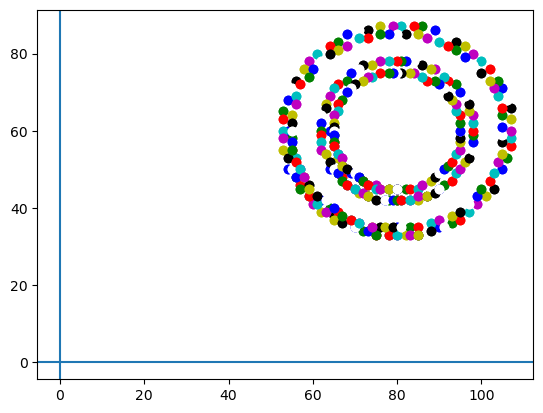

In [53]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from itertools import cycle

with open('./dumps/Cube.data', mode='rb') as fp:
    data = pickle.load(fp)

# print(data)
# print(mcolors.BASE_COLORS)

fig, ax = plt.subplots()
plt.axvline()
plt.axhline()
ax = plt.gca()
# ax.set_xlim([60, 80])
# ax.set_ylim([40, 80])

color = cycle(mcolors.BASE_COLORS)

print(np.shape(data))

for record in data:
    vertices_2d = record[:, :2]
    co = next(color)
    for single_vertices in vertices_2d:
        ax.scatter(single_vertices[0], single_vertices[1], c=co)




Text(77, -20, 'Camera_point')

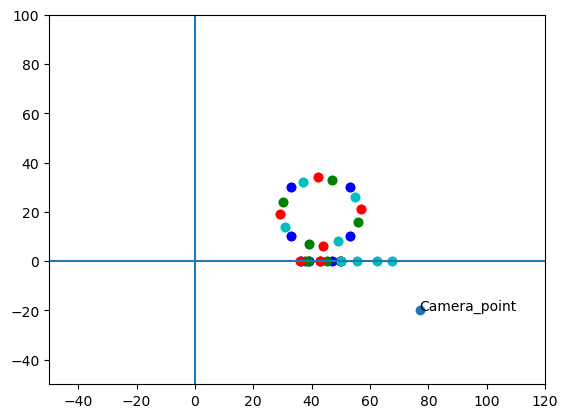

In [74]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from itertools import cycle

with open('./dumps/Renderer.data', mode='rb') as fp:
    data = pickle.load(fp)

fig, ax = plt.subplots()
plt.axvline()
plt.axhline()
ax = plt.gca()
ax.set_xlim([-50, 120])
ax.set_ylim([-50, 100])

color = cycle(mcolors.BASE_COLORS)

camera_point = data[1]
data = data[0]

count = -1
dest_count = 10

for snapshot in data:
    count += 1

    vert = snapshot[0][:, :2]
    t_vert = snapshot[1][:, :2]

    if count % 5 != 0:
        continue

    co = next(color)

    for idx in range(8):

        vert_2d = vert[idx]
        t_vert_2d = t_vert[idx]

        ax.scatter(*vert_2d, c=co)
        ax.scatter(*t_vert_2d, c=co)
    
    count += 1

ax.scatter(*camera_point[:2])
plt.annotate("Camera_point", camera_point[:2])
    # vertices_2d = record[:, :2]
    # co = next(color)
        # ax.scatter(single_vertices[0], single_vertices[1], c=co)


